In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
def my_func(x):
    return np.exp(-(x**2))
def my_func_prime(x):
    return -2*x * np.exp(-(x**2))

# DIFERENCIACION SIMPLE


In [12]:
def diff_simple(func,start,end,points):
    n_points = points
    x = np.linspace(start,end,n_points)
    h = x[1]-x[0]
    f = func(x)
    f_prime_diff = (f[1:] - f[0:-1])/h
    return (x[0:-1],f_prime_diff)





In [19]:
x,y = diff_simple(my_func,-10.0,10.0,10000)

# CENTRAL DIFFERENCE


In [20]:
def diff_central(func,start,end,points):
    n_points = points
    x = np.linspace(start,end,n_points)
    h = x[1]-x[0]
    f = func(x)
    f_prime_diff = (f[2:-1] - f[0:-3])/(2*h)
    return (x[1:-2],f_prime_diff)
    
    

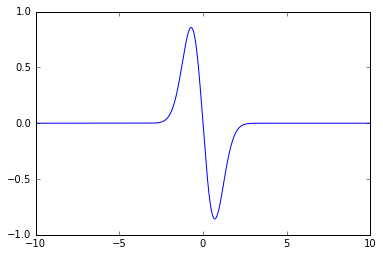

In [21]:
x,y = diff_central(my_func,-10.0,10.0,10000)
plt.plot(x,y)

# SEGUNDA DERIVADA


In [22]:
def segundaDerivada(func,start,end,points):
    n_points = points
    x = np.linspace(start,end,n_points)
    h = x[1]-x[0]
    f = func(x)
    f_prime_prime_diff = (f[2:-1] -2*f[1:-2] + f[0:-3])/(h**2)
    return (x[1:-2], f_prime_prime_diff)
    
    

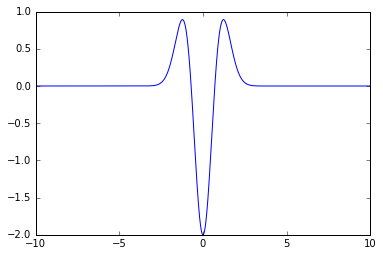

In [23]:
x,y = segundaDerivada(my_func,-10.0,10.0,10000)
plt.plot(x,y)

# ENCONTRANDO CEROS - NEWTON RAPHSON


In [26]:
def newtonRaphson(func,derivada,h,guess):
    while (abs(func(guess)) > 1E-3):
        delta_x = -func(guess)/derivada(guess,h)
        guess = guess + delta_x
        print(guess)

In [27]:


def my_func(x):
    return x**2 - 3*x - 10


def my_prime_func(x,h):
    return (my_func(x+h) - my_func(x-h))/(2.0*h)




In [28]:
newtonRaphson(my_func,my_prime_func,0.01,1)

-11.000000000000256
-5.24
-2.778753709198785
-2.07086845619168
-2.0007032376219676
-2.0000000706348295


In [29]:
newtonRaphson(my_func,my_prime_func,0.01,4)

5.200000000000026
5.005405405405405
5.000004167621746


# INTEGRAL SENCILLA con h


In [30]:
def integral(func,start,end,h):
    npoints  = int((end-start)/h)
    x = linspace(start,end,npoints)
    y = func(x)
    integral = sum(y) * h
    return integral

    

In [41]:
def mysin(x):
    return np.sin(x)
# mysin(0)
integral(mysin,0,pi,0.001)

1.9989859184830003

# INTEGRANDO CON SCIPY

In [45]:
from scipy import integrate
def integrarScipyTrapz(func,start,end,npoints):
    n_points = npoints
    x = linspace(start,end,n_points)
    return integrate.trapz(func(x), x)

In [46]:
integrarScipyTrapz(mysin,0,pi,1000)

1.9999983517708519

In [47]:
def integrarScipySimps(func,start,end,npoints):
    n_points = npoints
    x = linspace(start,end,n_points)
    return integrate.simps(func(x), x)

In [49]:
integrarScipySimps(mysin,0,pi,1000)

1.9999999999970117

# INTEGRAL 2D MONTECARLO

In [58]:
def integralMontecarlo(func,start,end,npointsx,npointsMonteCarlo):
    contIn = 0.0
    contTot = npointsMonteCarlo
    x = linspace(start,end,npointsx)
    y = func(x)
    maxy = amax(y)
    randx = np.random.uniform(start,end,npointsMonteCarlo)
    randy = np.random.uniform(0.0,maxy,npointsMonteCarlo)
    for i in range(npointsMonteCarlo):
        if(func(randx[i])-randy[i]>0):
            contIn+=1
        
    return (contIn/(npointsMonteCarlo))*(end-start)*maxy
    

In [61]:
integralMontecarlo(mysin,0.0,pi,10000,1000000)

2.0002425930807202

In [65]:
x,y = np.loadtxt("red3.txt",delimiter=' ', usecols=(0, 1), unpack=True)

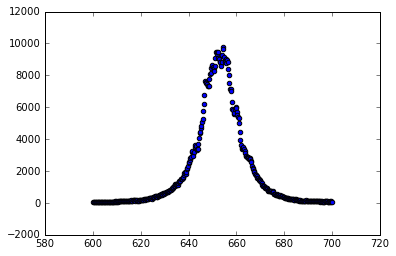

In [67]:
plt.scatter(x,y)